# **K-Nearest Neighbors**

In [ ]:
# Import Library.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Import Dataset.
data = pd.read_csv("Social_Network_Ads.csv")
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
data = data.fillna(data.mean()) # Imputation Using Mean Values.

In [ ]:
# Split dataset in features and target variable.
train_X = data.iloc[:,:-1] 
train_y = data.iloc[:, -1]

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

train_X = StandardScaler().fit_transform(train_X)

In [ ]:
# Split dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(train_X, train_y, test_size = 0.2, random_state = 10)

**Predictive Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

# Predictions and Evaluations.
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, Y_pred))

print(classification_report(Y_test, Y_pred))

[[47  5]
 [ 1 27]]
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        52
           1       0.84      0.96      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



# **Choosing a 'K' Value: Use the Elbow Method to pick a good 'K' Value.**

[Elbow Method - Wikipedia](https://en.wikipedia.org/wiki/Elbow_method_(clustering))

[Elbow Method](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html)

In [ ]:
error_rate = []

for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors=i).fit(X_train, Y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

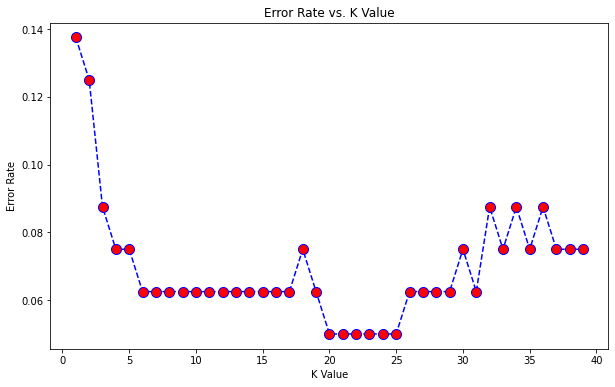

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

Here we can see that when the $K$ value lies between 20 to 25, the error rate just tends to hover around 0.04-0.03 (i.e., the minimum). Let's retrain the model with that and check the classification report!

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=23).fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

# Predictions and Evaluations.
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, Y_pred))

print(classification_report(Y_test, Y_pred))

[[49  3]
 [ 1 27]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        52
           1       0.90      0.96      0.93        28

    accuracy                           0.95        80
   macro avg       0.94      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80

